<a href="https://colab.research.google.com/github/faijurrahman/AI/blob/main/Detecting_Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

 77% 51.0M/66.0M [00:00<00:00, 102MB/s] 
100% 66.0M/66.0M [00:00<00:00, 112MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8675892d0>,
      dtype=object)

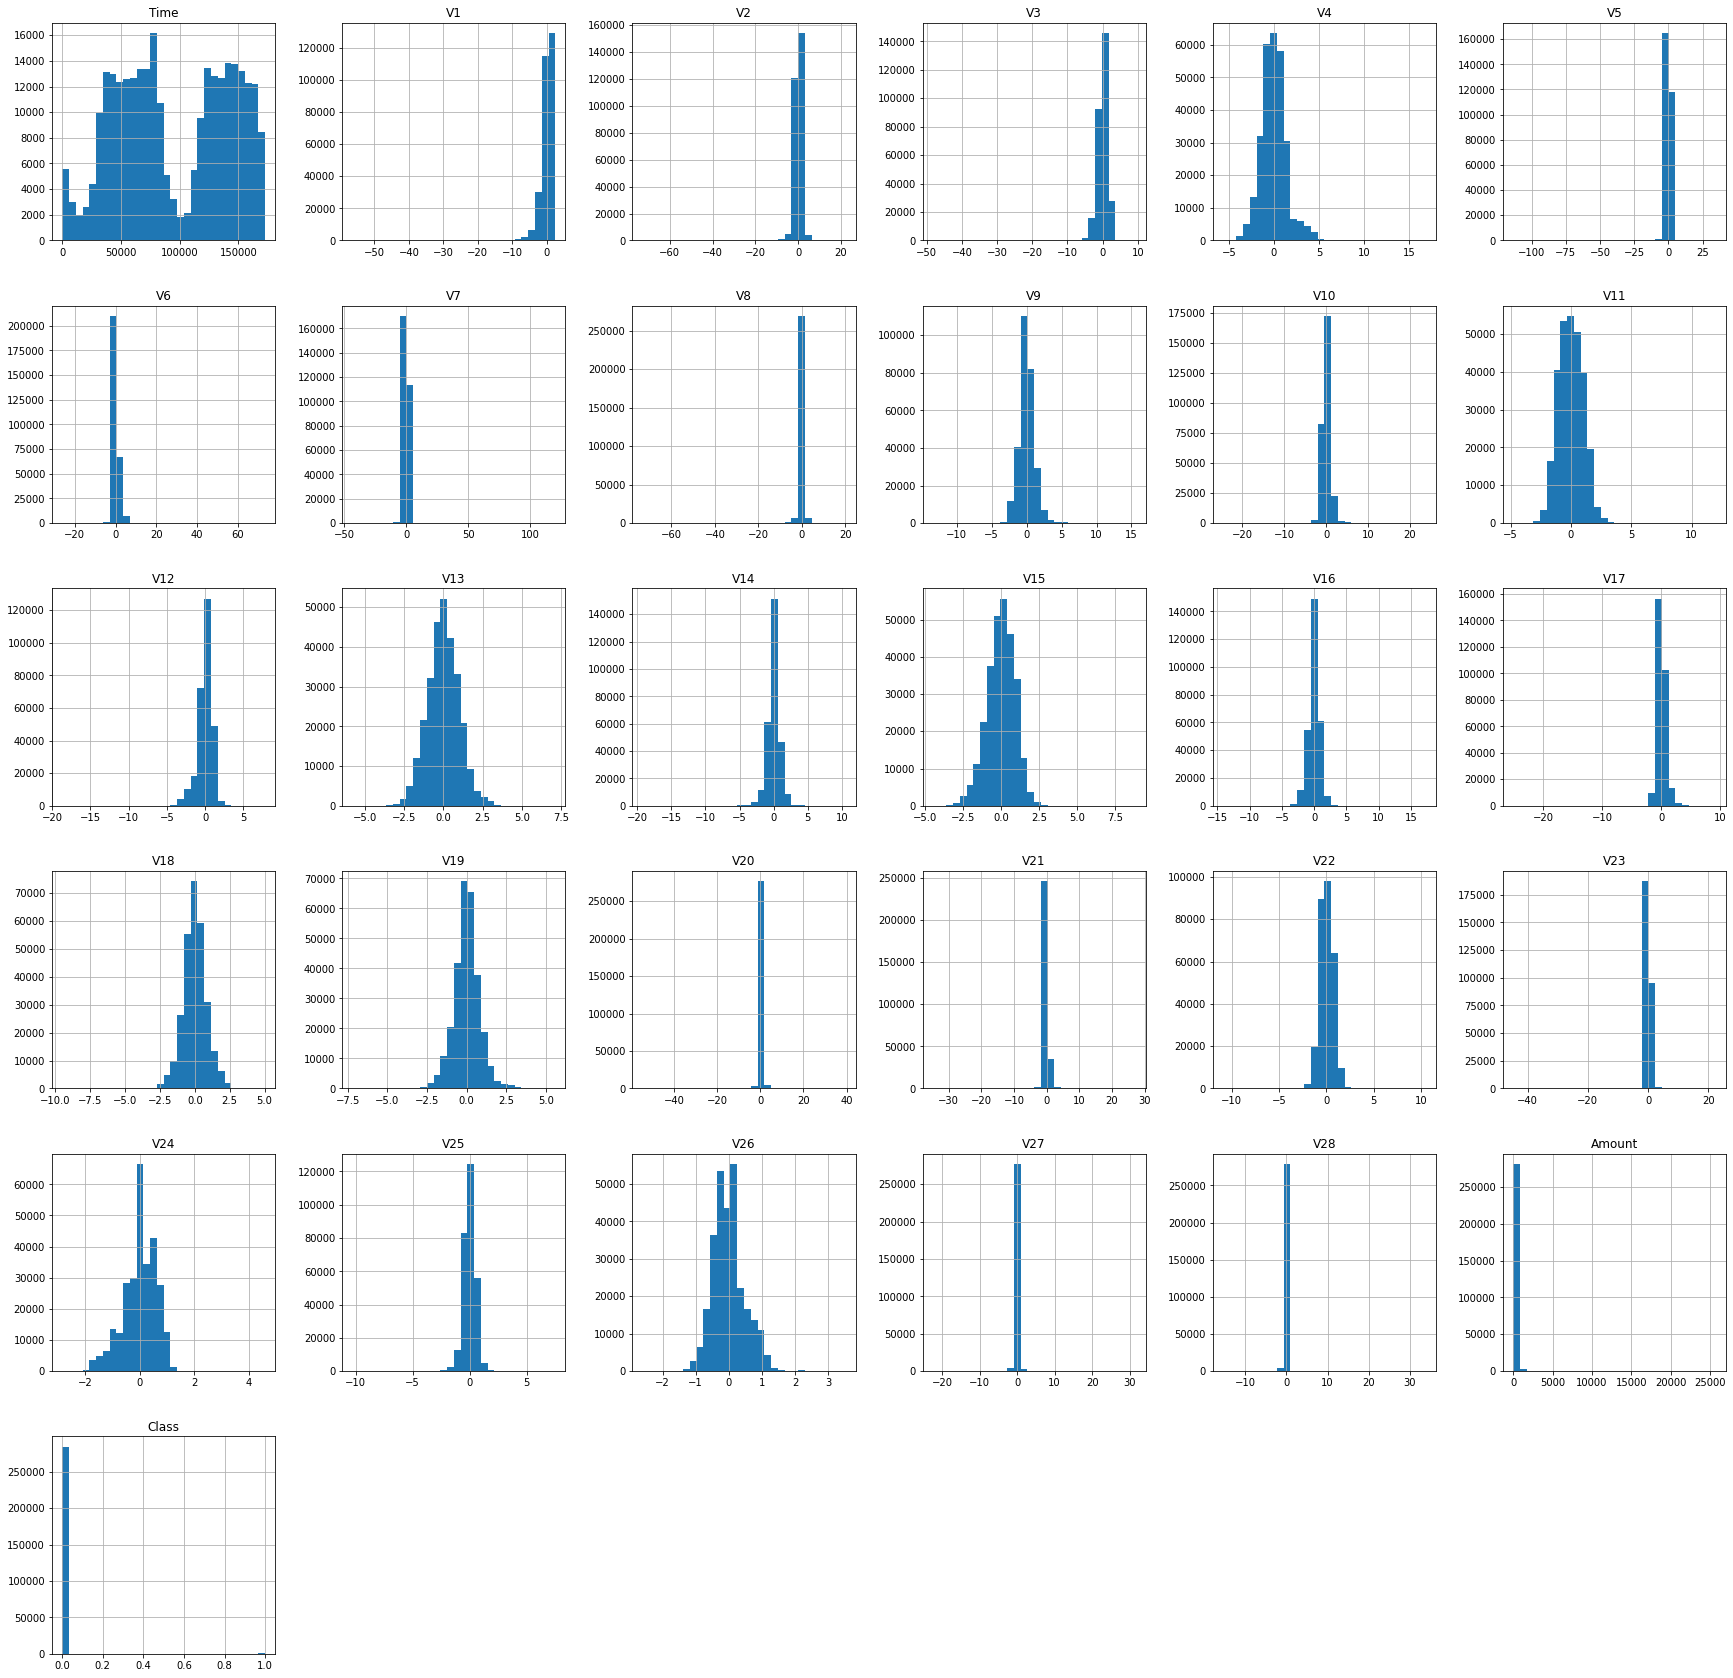

In [ ]:
df.hist(bins=30, figsize=(30, 30))

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [ ]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,-0.854023,0.547347,0.616448,-0.101785,-0.608492,-0.288559,-0.606199,-0.900746,-0.201311,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,0.096501,0.710309,0.778924,0.353867,0.953048,-0.103542,0.128899,-0.964070,-0.477130,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,-0.813214,0.111898,1.133875,-0.649766,0.861035,0.583787,-0.344094,0.028312,0.219760,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,0.905210,-0.277872,-1.336179,-0.012238,0.212828,0.769345,-1.010534,0.357288,-0.125585,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,0.101512,-0.433200,-0.634867,-1.188354,1.028063,0.576121,1.068353,0.332690,-0.362811,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,0.346951,0.276998,-0.167592,0.213818,-0.139022,-1.375023,-0.426207,0.771636,0.967956,-0.170608,4.315113,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,-0.400162,0.113700,1.666005,1.587666,-0.683250,-1.059042,0.368635,-0.608646,0.089697,1.132807,0.396079,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,-0.480985,-0.395574,-0.129168,-0.294736,-1.026354,-0.348257,-0.199641,1.589715,-0.284752,-0.374565,-0.127011,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,0.102675,1.051043,1.643280,1.265712,-0.306132,-0.004562,0.739688,-0.931197,0.364436,-0.199706,0.088014,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [ ]:
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(0    239589
 1       411
 Name: Class, dtype: int64, 0    21955
 1       45
 Name: Class, dtype: int64, 0    22771
 1       36
 Name: Class, dtype: int64)

In [ ]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [ ]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9992375

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
shallow_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
_________________________________________________________________
batch_normalization (BatchNo (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________


In [ ]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 [==============================] - 13s 2ms/step - loss: 0.0505 - accuracy: 0.9890 - val_loss: 0.0093 - val_accuracy: 0.9992
INFO:tensorflow:Assets written to: shallow_nn/assets
Epoch 2/5
7500/7500 [==============================] - 13s 2ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0083 - val_accuracy: 0.9993
INFO:tensorflow:Assets written to: shallow_nn/assets
Epoch 3/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0081 - val_accuracy: 0.9993
INFO:tensorflow:Assets written to: shallow_nn/assets
Epoch 4/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0080 - val_accuracy: 0.9992
INFO:tensorflow:Assets written to: shallow_nn/assets
Epoch 5/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0089 - val_accuracy: 0.9990


In [ ]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.65      0.78      0.71        36

    accuracy                           1.00     22807
   macro avg       0.83      0.89      0.85     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.81      0.47      0.60        36

    accuracy                           1.00     22807
   macro avg       0.90      0.74      0.80     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.67      0.67      0.67        36

    accuracy                           1.00     22807
   macro avg       0.83      0.83      0.83     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.65      0.78      0.71        36

    accuracy                           1.00     22807
   macro avg       0.83      0.89      0.85     22807
weighted avg       1.00      1.00      1.00     22807



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,-0.854023,0.547347,0.616448,-0.101785,-0.608492,-0.288559,-0.606199,-0.900746,-0.201311,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,0.096501,0.710309,0.778924,0.353867,0.953048,-0.103542,0.128899,-0.964070,-0.477130,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,-0.813214,0.111898,1.133875,-0.649766,0.861035,0.583787,-0.344094,0.028312,0.219760,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,0.905210,-0.277872,-1.336179,-0.012238,0.212828,0.769345,-1.010534,0.357288,-0.125585,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,0.101512,-0.433200,-0.634867,-1.188354,1.028063,0.576121,1.068353,0.332690,-0.362811,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0


In [ ]:
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(0    284315
 Name: Class, dtype: int64, 1    492
 Name: Class, dtype: int64)

In [ ]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18372,0.170309,-1.762593,0.256143,1.683125,-1.279233,-1.902762,1.004210,-1.009748,-2.432546,0.458860,0.313475,-0.610600,0.448338,0.694015,-1.553956,-1.682784,0.430354,1.005715,-2.050401,-0.146696,-1.033500,2.493579,0.320829,-0.535481,0.499401,-0.915196,-0.423434,0.107049,0.175922,2.906449,0
96341,0.380388,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,0.264545,0.881268,-0.324704,-0.263264,-1.112735,-0.540850,1.533411,0.831443,-0.473347,1.190121,0.273799,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1.062111,1
248296,0.890522,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,4.436319,-4.503801,-0.954361,-9.861372,-0.505329,0.269282,0.591319,1.795992,-1.085208,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1
264328,0.933932,-0.011624,0.640413,0.868046,-0.505279,0.261938,0.223098,0.239049,0.150877,0.225142,-0.414323,0.822471,1.232970,0.685337,-0.056341,-0.326394,0.081963,-0.767352,0.372928,0.445735,-0.091404,0.069401,0.268024,0.261459,0.683742,-1.567901,-0.816674,0.185781,0.283021,-0.272619,0
208904,0.794730,-0.679341,1.217389,-0.316778,-1.086725,0.855349,-0.980760,0.970589,0.133116,-0.357671,-0.975785,-1.570351,0.532415,0.959700,0.403010,-0.449314,-0.250583,-0.436450,-0.407617,0.354953,-0.028974,-0.083048,-0.137032,-0.238920,-0.617244,0.039020,-0.081848,0.234633,0.128382,-0.307273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81557,0.341393,-4.502731,-3.876484,1.341248,0.113400,0.189428,-0.560985,-0.140478,0.684651,0.475363,-1.250973,0.903202,1.054454,-0.431374,-0.130883,-1.178010,0.310936,0.038339,-0.346526,-0.157144,-0.343606,-0.140218,0.049411,2.313731,0.252330,0.307219,0.859051,0.184033,-0.308269,4.227625,0
276071,0.965803,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,0.249311,1.338318,-0.329759,-0.363591,-1.824839,-0.229679,1.842347,1.194212,0.037467,0.423099,0.037438,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,-0.028645,1
175971,0.709373,1.972989,0.157281,-1.715078,1.207451,0.681612,-0.615282,0.601791,-0.291935,-0.132265,0.400317,0.539461,1.237827,0.338245,0.590542,-1.261344,-0.474055,-0.531967,-0.130902,0.179441,-0.201707,0.098640,0.467533,-0.078973,-0.371882,0.486038,-0.490665,-0.018374,-0.070911,0.075735,0
27738,0.200727,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,-3.717450,3.907399,-7.220004,-1.211739,-9.657627,0.927518,-4.738662,-9.276636,-3.081961,0.177746,0.513530,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1


In [ ]:
492*2

984

In [ ]:
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [ ]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    353
 0    347
 dtype: int64, 0    73
 1    69
 dtype: int64, 0    72
 1    70
 dtype: int64)

In [ ]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [ ]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 1s 10ms/step - loss: 0.9642 - accuracy: 0.3871 - val_loss: 1.3415 - val_accuracy: 0.2887
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 2/40
22/22 [==============================] - 0s 4ms/step - loss: 0.9087 - accuracy: 0.4286 - val_loss: 1.0779 - val_accuracy: 0.2887
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 3/40
22/22 [==============================] - 0s 3ms/step - loss: 0.8669 - accuracy: 0.4443 - val_loss: 0.9289 - val_accuracy: 0.3662
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 4/40
22/22 [==============================] - 0s 3ms/step - loss: 0.8119 - accuracy: 0.4871 - val_loss: 0.8236 - val_accuracy: 0.4718
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 5/40
22/22 [==============================] - 0s 4ms/step - loss: 0.7651 - accuracy: 0.5243 - val_loss: 0.7198 - val_accuracy: 0.5563
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 6/40
22/22 [======

In [ ]:
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 0s 5ms/step - loss: 0.2100 - accuracy: 0.9486 - val_loss: 0.2448 - val_accuracy: 0.9085
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 2/40
22/22 [==============================] - 0s 4ms/step - loss: 0.1981 - accuracy: 0.9414 - val_loss: 0.2374 - val_accuracy: 0.9225
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 3/40
22/22 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9486 - val_loss: 0.2324 - val_accuracy: 0.9225
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 4/40
22/22 [==============================] - 0s 4ms/step - loss: 0.1902 - accuracy: 0.9486 - val_loss: 0.2280 - val_accuracy: 0.9296
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 5/40
22/22 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9414 - val_loss: 0.2217 - val_accuracy: 0.9296
INFO:tensorflow:Assets written to: shallow_nn_b/assets
Epoch 6/40
22/22 [=======

In [ ]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.92      0.94        72
       Fraud       0.92      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [ ]:
shallow_nn_b1 = Sequential()
shallow_nn_b1.add(InputLayer((x_train.shape[1],)))
shallow_nn_b1.add(Dense(1, 'relu'))
shallow_nn_b1.add(BatchNormalization())
shallow_nn_b1.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b1', save_best_only=True)
shallow_nn_b1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 1s 9ms/step - loss: 0.6140 - accuracy: 0.6386 - val_loss: 0.6185 - val_accuracy: 0.6761
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 2/40
22/22 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7029 - val_loss: 0.5572 - val_accuracy: 0.7394
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 3/40
22/22 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7271 - val_loss: 0.5204 - val_accuracy: 0.7746
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 4/40
22/22 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.7514 - val_loss: 0.4948 - val_accuracy: 0.8380
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 5/40
22/22 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7814 - val_loss: 0.4752 - val_accuracy: 0.8521
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 6/40
22/22 [==

In [ ]:
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 0s 5ms/step - loss: 0.2279 - accuracy: 0.9186 - val_loss: 0.2110 - val_accuracy: 0.9296
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 2/40
22/22 [==============================] - 0s 4ms/step - loss: 0.2105 - accuracy: 0.9257 - val_loss: 0.2106 - val_accuracy: 0.9296
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 3/40
22/22 [==============================] - 0s 4ms/step - loss: 0.2176 - accuracy: 0.9286 - val_loss: 0.2078 - val_accuracy: 0.9225
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 4/40
22/22 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.9257 - val_loss: 0.2071 - val_accuracy: 0.9225
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 5/40
22/22 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9186 - val_loss: 0.2063 - val_accuracy: 0.9225
INFO:tensorflow:Assets written to: shallow_nn_b1/assets
Epoch 6/40
22/22 [==

In [ ]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b1, x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.92      0.93      0.92        72
       Fraud       0.93      0.91      0.92        70

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142



In [ ]:
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, rf.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.69      1.00      0.82        72
       Fraud       1.00      0.54      0.70        70

    accuracy                           0.77       142
   macro avg       0.85      0.77      0.76       142
weighted avg       0.84      0.77      0.76       142



In [ ]:
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.81      1.00      0.89        72
       Fraud       1.00      0.76      0.86        70

    accuracy                           0.88       142
   macro avg       0.90      0.88      0.88       142
weighted avg       0.90      0.88      0.88       142



In [ ]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      1.00      0.94        72
       Fraud       1.00      0.87      0.93        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      1.00      0.94        72
       Fraud       1.00      0.87      0.93        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print(classification_report(y_test_b, neural_net_predictions(shallow_nn_b, x_test_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.93      0.92      0.92        73
       Fraud       0.91      0.93      0.92        69

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142

